In [1]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)
# 레이블을 벡터로 변환합니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Using TensorFlow backend.


In [2]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [3]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [4]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 7s 263us/step - loss: 0.4629 - acc: 0.8178 - val_loss: 0.3394 - val_acc: 0.8810
Epoch 2/20
25000/25000 [==============================] - 5s 202us/step - loss: 0.2610 - acc: 0.9091 - val_loss: 0.3037 - val_acc: 0.8781
Epoch 3/20
25000/25000 [==============================] - 5s 192us/step - loss: 0.2004 - acc: 0.9300 - val_loss: 0.2845 - val_acc: 0.8852
Epoch 4/20
25000/25000 [==============================] - 5s 189us/step - loss: 0.1677 - acc: 0.9408 - val_loss: 0.2948 - val_acc: 0.8830
Epoch 5/20
25000/25000 [==============================] - 5s 183us/step - loss: 0.1466 - acc: 0.9494 - val_loss: 0.3084 - val_acc: 0.8797
Epoch 6/20
25000/25000 [==============================] - 5s 183us/step - loss: 0.1269 - acc: 0.9566 - val_loss: 0.3289 - val_acc: 0.8752
Epoch 7/20
25000/25000 [==============================] - 5s 182us/step - loss: 0.1124 - acc: 0.9616 - val_loss: 0.3508 - 

In [5]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 190us/step - loss: 0.5737 - acc: 0.7197 - val_loss: 0.5150 - val_acc: 0.8102
Epoch 2/20
25000/25000 [==============================] - 5s 183us/step - loss: 0.4698 - acc: 0.8635 - val_loss: 0.4802 - val_acc: 0.8636
Epoch 3/20
25000/25000 [==============================] - 4s 180us/step - loss: 0.4270 - acc: 0.9027 - val_loss: 0.4713 - val_acc: 0.8586
Epoch 4/20
25000/25000 [==============================] - 5s 181us/step - loss: 0.3958 - acc: 0.9241 - val_loss: 0.4620 - val_acc: 0.8740
Epoch 5/20
25000/25000 [==============================] - 5s 183us/step - loss: 0.3709 - acc: 0.9376 - val_loss: 0.4626 - val_acc: 0.8728
Epoch 6/20
25000/25000 [==============================] - 5s 181us/step - loss: 0.3495 - acc: 0.9473 - val_loss: 0.4927 - val_acc: 0.8610
Epoch 7/20
25000/25000 [==============================] - 5s 180us/step - loss: 0.3321 - acc: 0.9542 - val_loss: 0.4619 - 

In [6]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

In [7]:
import matplotlib.pyplot as plt

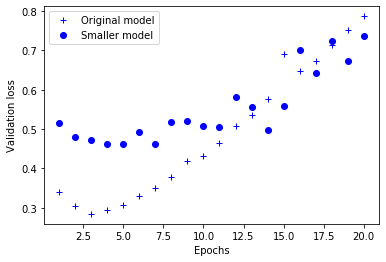

In [8]:
# ‘b+’는 파란색 덧셈 기호을 의미합니다
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [9]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [10]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 16s 657us/step - loss: 0.5569 - acc: 0.7847 - val_loss: 0.2978 - val_acc: 0.8846
Epoch 2/20
25000/25000 [==============================] - 17s 668us/step - loss: 0.2250 - acc: 0.9130 - val_loss: 0.2775 - val_acc: 0.8886
Epoch 3/20
25000/25000 [==============================] - 17s 666us/step - loss: 0.1118 - acc: 0.9592 - val_loss: 0.3652 - val_acc: 0.8858
Epoch 4/20
25000/25000 [==============================] - 16s 638us/step - loss: 0.0543 - acc: 0.9832 - val_loss: 0.4762 - val_acc: 0.8824
Epoch 5/20
25000/25000 [==============================] - 16s 655us/step - loss: 0.1095 - acc: 0.9870 - val_loss: 0.5157 - val_acc: 0.8846
Epoch 6/20
25000/25000 [==============================] - 17s 677us/step - loss: 6.1491e-04 - acc: 1.0000 - val_loss: 0.6954 - val_acc: 0.8844
Epoch 7/20
25000/25000 [==============================] - 16s 660us/step - loss: 0.1856 - acc: 0.9878 - val_loss

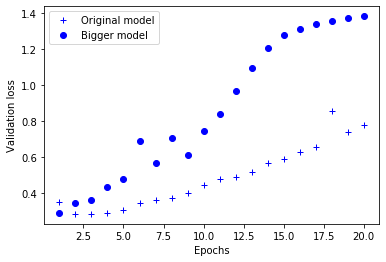

In [11]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

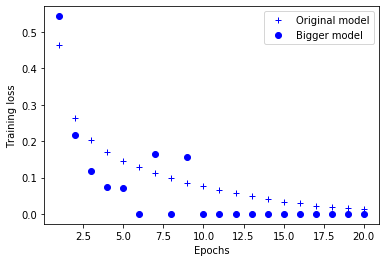

In [12]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [13]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [15]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 210us/step - loss: 0.5039 - acc: 0.8134 - val_loss: 0.3878 - val_acc: 0.8794
Epoch 2/20
25000/25000 [==============================] - 5s 208us/step - loss: 0.3199 - acc: 0.9068 - val_loss: 0.3599 - val_acc: 0.8754
Epoch 3/20
25000/25000 [==============================] - 5s 199us/step - loss: 0.2739 - acc: 0.9198 - val_loss: 0.3361 - val_acc: 0.8861
Epoch 4/20
25000/25000 [==============================] - 5s 201us/step - loss: 0.2533 - acc: 0.9272 - val_loss: 0.3335 - val_acc: 0.8878
Epoch 5/20
25000/25000 [==============================] - 5s 197us/step - loss: 0.2411 - acc: 0.9309 - val_loss: 0.3487 - val_acc: 0.8811
Epoch 6/20
25000/25000 [==============================] - 5s 200us/step - loss: 0.2335 - acc: 0.9358 - val_loss: 0.3936 - val_acc: 0.8666
Epoch 7/20
25000/25000 [==============================] - 5s 202us/step - loss: 0.2268 - acc: 0.9388 - val_loss: 0.3695 - 

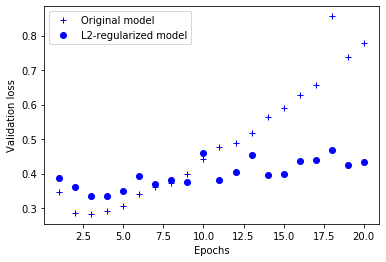

In [16]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [17]:
from keras import regularizers

# L1 규제
regularizers.l1(0.001)

# L1과 L2 규제 병행
regularizers.l1_l2(l1=0.001, l2=0.001)

In [18]:
l1_model = models.Sequential()
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu', input_shape=(10000,)))
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [20]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 206us/step - loss: 0.5551 - acc: 0.8216 - val_loss: 0.4244 - val_acc: 0.8807
Epoch 2/20
25000/25000 [==============================] - 6s 224us/step - loss: 0.3749 - acc: 0.8957 - val_loss: 0.3919 - val_acc: 0.8784
Epoch 3/20
25000/25000 [==============================] - 5s 215us/step - loss: 0.3346 - acc: 0.9080 - val_loss: 0.3843 - val_acc: 0.8766
Epoch 4/20
25000/25000 [==============================] - 5s 210us/step - loss: 0.3198 - acc: 0.9098 - val_loss: 0.3661 - val_acc: 0.8849
Epoch 5/20
25000/25000 [==============================] - 5s 205us/step - loss: 0.3108 - acc: 0.9158 - val_loss: 0.3731 - val_acc: 0.8824
Epoch 6/20
25000/25000 [==============================] - 5s 203us/step - loss: 0.3024 - acc: 0.9168 - val_loss: 0.3811 - val_acc: 0.8790
Epoch 7/20
25000/25000 [==============================] - 5s 202us/step - loss: 0.2941 - acc: 0.9219 - val_loss: 0.3720 - 

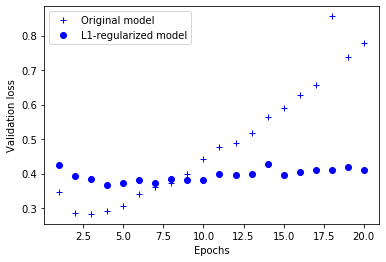

In [21]:
l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'bo', label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [22]:
l1l2_model = models.Sequential()
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu', input_shape=(10000,)))
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu'))
l1l2_model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
l1l2_model.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['acc'])

In [24]:
l1l2_model_hist = l1l2_model.fit(x_train, y_train,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 217us/step - loss: 0.5746 - acc: 0.8096 - val_loss: 0.4449 - val_acc: 0.8602
Epoch 2/20
25000/25000 [==============================] - 5s 206us/step - loss: 0.3753 - acc: 0.8948 - val_loss: 0.3697 - val_acc: 0.8875
Epoch 3/20
25000/25000 [==============================] - 5s 207us/step - loss: 0.3263 - acc: 0.9081 - val_loss: 0.3686 - val_acc: 0.8812
Epoch 4/20
25000/25000 [==============================] - 5s 203us/step - loss: 0.3029 - acc: 0.9152 - val_loss: 0.3506 - val_acc: 0.8886
Epoch 5/20
25000/25000 [==============================] - 5s 205us/step - loss: 0.2888 - acc: 0.9204 - val_loss: 0.3713 - val_acc: 0.8783
Epoch 6/20
25000/25000 [==============================] - 5s 204us/step - loss: 0.2785 - acc: 0.9238 - val_loss: 0.3564 - val_acc: 0.8863
Epoch 7/20
25000/25000 [==============================] - 5s 211us/step - loss: 0.2739 - acc: 0.9256 - val_loss: 0.3703 - 

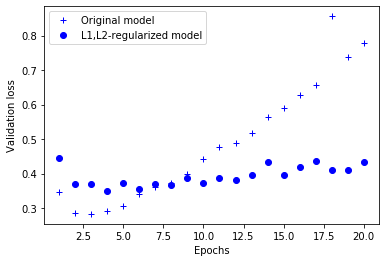

In [25]:
l1l2_model_val_loss = l1l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1l2_model_val_loss, 'bo', label='L1,L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [27]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [28]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 203us/step - loss: 0.6197 - acc: 0.6831 - val_loss: 0.5428 - val_acc: 0.8226
Epoch 2/20
25000/25000 [==============================] - 5s 190us/step - loss: 0.5044 - acc: 0.8337 - val_loss: 0.4483 - val_acc: 0.8586
Epoch 3/20
25000/25000 [==============================] - 5s 183us/step - loss: 0.4243 - acc: 0.8720 - val_loss: 0.3841 - val_acc: 0.8838
Epoch 4/20
25000/25000 [==============================] - 5s 182us/step - loss: 0.3646 - acc: 0.8954 - val_loss: 0.3504 - val_acc: 0.8854
Epoch 5/20
25000/25000 [==============================] - 5s 183us/step - loss: 0.3267 - acc: 0.9111 - val_loss: 0.3411 - val_acc: 0.8862
Epoch 6/20
25000/25000 [==============================] - 5s 183us/step - loss: 0.2899 - acc: 0.9219 - val_loss: 0.3260 - val_acc: 0.8831
Epoch 7/20
25000/25000 [==============================] - 5s 183us/step - loss: 0.2673 - acc: 0.9242 - val_loss: 0.3404 - 

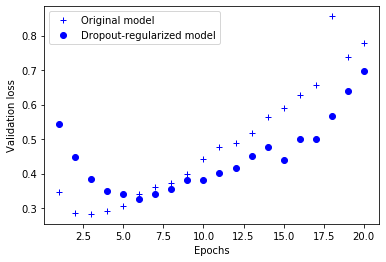

In [29]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()